# Project – Analyzing the trends of COVID-19 with Python

Problem Statement:
Given data about COVID 19 patients, write code to visualize the impact and analyze the trend
of rate of infection and recovery as well as make predictions about the number of cases
expected a week in future based on the current trends

Guidelines:
• Use pandas to accumulate data• Use plotly (visualization library) to create interactive visualizations
• Use Facebook prophet library to make time series models
• Visualize the prediction by combining these technologies

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import warnings

%matplotlib inline

In [59]:
data=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [60]:
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [61]:
data.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long',
                     'Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active'},inplace=True)

In [62]:
data['active']=data['confirmed']-data['deaths']-data['recovered']

In [63]:
#To find all the cases on last value in date
top=data[data['date']==data['date'].max()]
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,NaN,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [64]:
w=top.groupby('country')['confirmed','active','deaths'].sum().reset_index()

In [65]:
w

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140


In [1]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

NameError: name 'px' is not defined

Text(0, 0.5, 'Cases total')

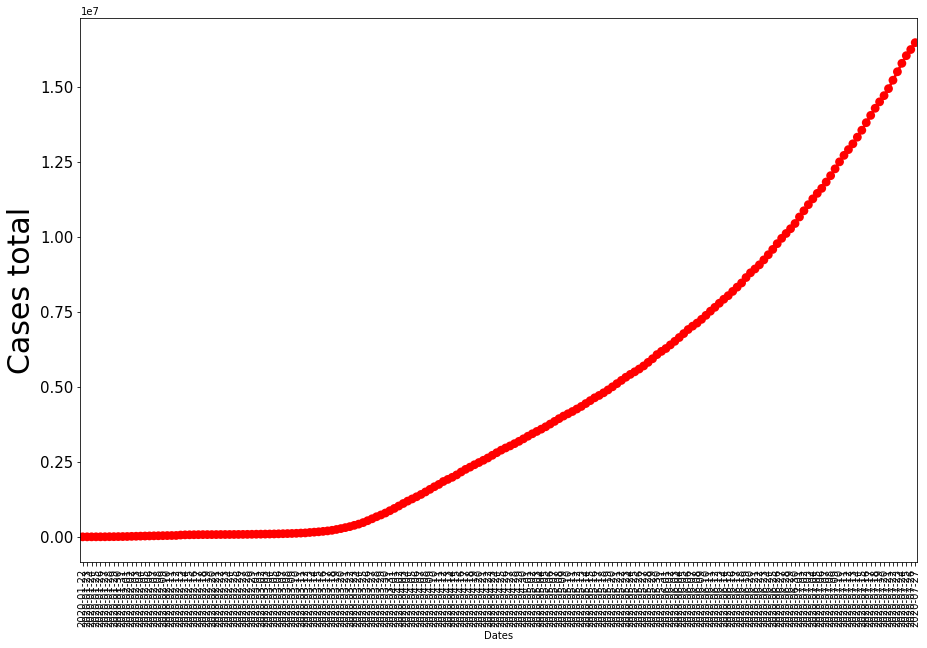

In [11]:
#plot for confirmed cases
plt.figure(figsize=(15,10))

#t_cases=data.groupby('date')['date','confirmed'].sum().reset_index()
t_cases=data.groupby('date')['confirmed'].sum().reset_index()
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date,y=t_cases.confirmed,color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

In [12]:
t_cases

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [13]:
#Top 20 countries having most active cases
t_actives=top.groupby(by='country')['active'].sum().sort_values(ascending=False).head(20).reset_index()
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


Text(0, 0.5, 'Countryl')

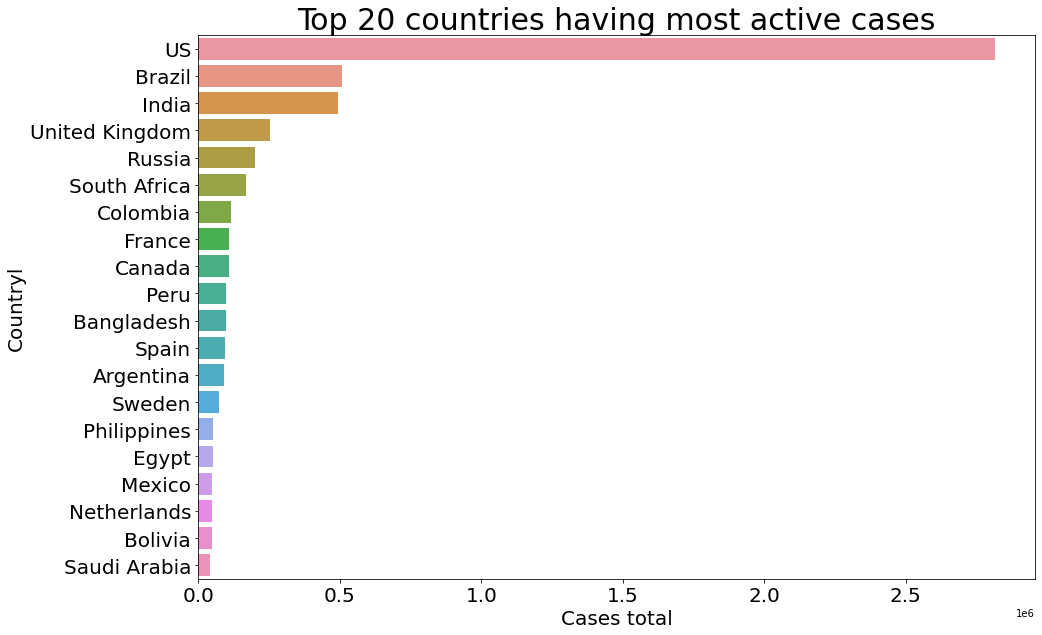

In [14]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)
#for i,(value,name) in enumerate(zip(t_actives.active,t_actives.country)):
#    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countryl',fontsize=20)

In [15]:
#Top 20 countries having most death
t_deaths=top.groupby(by='country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()
t_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


Text(0, 0.5, 'Country')

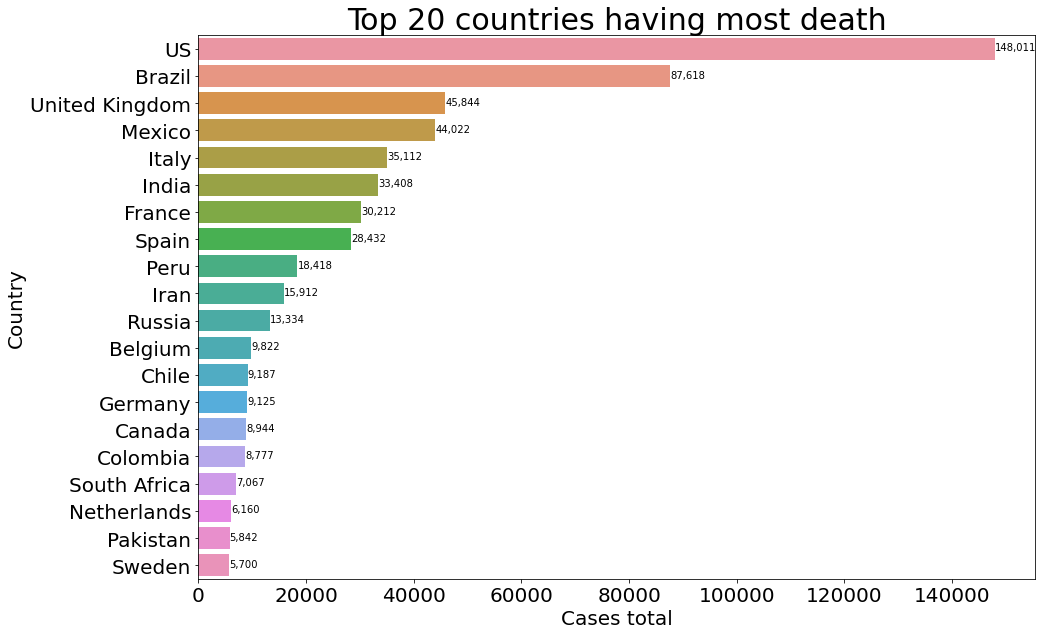

In [16]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)
for i,(value,name) in enumerate(zip(t_deaths.deaths,t_deaths.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

#Top 20 countries having most recovered

In [17]:
recover=top.groupby(by='country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()
recover

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


Text(0, 0.5, 'Country')

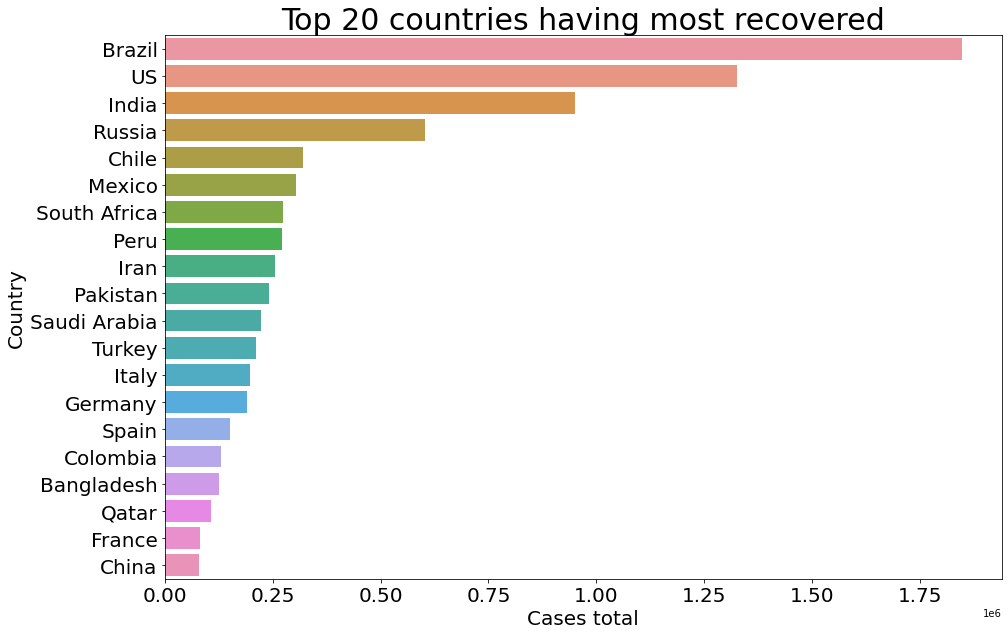

In [18]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most recovered',fontsize=30)
a=sns.barplot(x=recover.recovered,y=recover.country)
#for i,(value,name) in enumerate(zip(recover.recovered,recover.country)):
#    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [19]:
Brazil=data[data.country=='Brazil']
Brazil=Brazil.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()

C:\Users\Dell\AppData\Local\Temp\ipykernel_19848\82695934.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [20]:
US=data[data.country=='US']
US=US.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
US=US.iloc[33:].reset_index().drop('index',axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19848\1653174177.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [21]:
Russia=data[data.country=='US']
Russia=Russia.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
Russia=Russia.iloc[10:].reset_index().drop('index',axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19848\3185133253.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [22]:
India=data[data.country=='US']
India=India.groupby(by='date')['recovered','deaths','confirmed','active'].sum().reset_index()
India=India.iloc[9:].reset_index().drop('index',axis=1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19848\2501361580.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: F

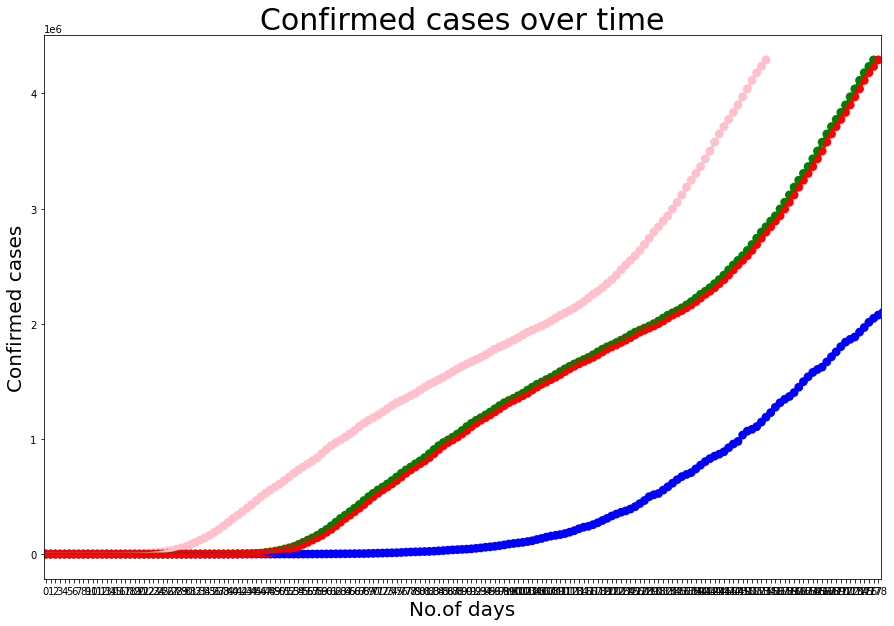

In [23]:
plt.figure(figsize=(15,10))
sns.pointplot(Brazil.index,Brazil.confirmed,color="Blue")
sns.pointplot(US.index,US.confirmed,color="Pink")
sns.pointplot(Russia.index,Russia.confirmed,color="Green")
sns.pointplot(India.index,India.confirmed,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Confirmed cases',fontsize=20)
plt.title('Confirmed cases over time',fontsize=30)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: F

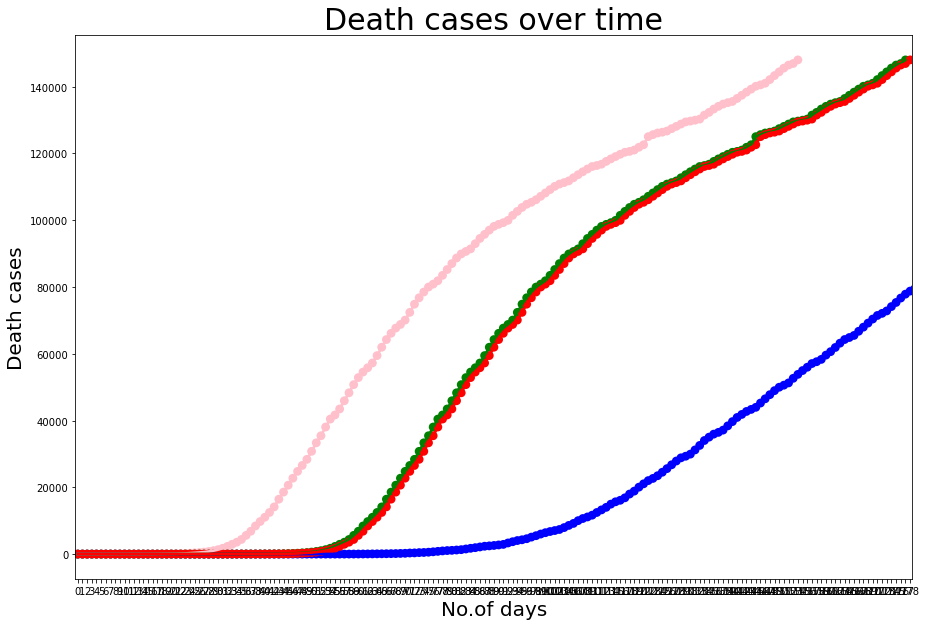

In [23]:
plt.figure(figsize=(15,10))
sns.pointplot(Brazil.index,Brazil.deaths,color="Blue")
sns.pointplot(US.index,US.deaths,color="Pink")
sns.pointplot(Russia.index,Russia.deaths,color="Green")
sns.pointplot(India.index,India.deaths,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Death cases',fontsize=20)
plt.title('Death cases over time',fontsize=30)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: F

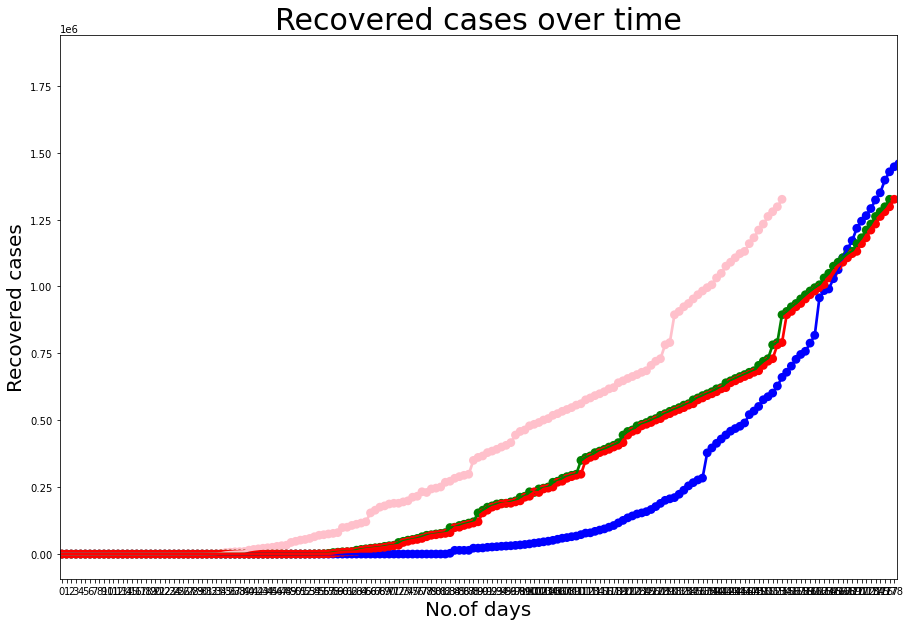

In [24]:
plt.figure(figsize=(15,10))
sns.pointplot(Brazil.index,Brazil.recovered,color="Blue")
sns.pointplot(US.index,US.recovered,color="Pink")
sns.pointplot(Russia.index,Russia.recovered,color="Green")
sns.pointplot(India.index,India.recovered,color="Red")
plt.xlabel('No.of days',fontsize=20)
plt.ylabel('Recovered cases',fontsize=20)
plt.title('Recovered cases over time',fontsize=30)
plt.show()

In [25]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732018 sha256=5128e6b75eb00a63135386148c588d86a95467cce21cbf2332297167215587e1
  Stored in directory: c:\users\dell\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81

Successfully built pymeeus


In [26]:
from prophet import Prophet

In [27]:
import os
os

<module 'os' from 'C:\\Users\\Dell\\anaconda3\\lib\\os.py'>

In [28]:
#data=pd.read_csv('covid_19_clean_complete.csv',parse_dates=['Date'])

In [29]:
data.head()

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [30]:
data.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510
2020-01-23,5594.20365,6140.869714,654,18,30,606
2020-01-24,5594.20365,6140.869714,941,26,36,879
2020-01-25,5594.20365,6140.869714,1434,42,39,1353
2020-01-26,5594.20365,6140.869714,2118,56,52,2010


In [31]:
total_active=data['active'].sum()
print('Total no.of active COVID 19 CASES',total_active)

Total no.of active COVID 19 CASES 396715350


In [32]:
#data['Active']=data['confirmed']-data['deaths']+data['recovered']

In [33]:
#total_active=data['Active'].sum()
#print('Total no.of active COVID 19 CASES',total_active)

In [34]:
confirmed = data.groupby('date').sum()['confirmed'].reset_index()
deaths = data.groupby('date').sum()['deaths'].reset_index()
recovered = data.groupby('date').sum()['recovered'].reset_index()
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [35]:
#!pip install pystan~=2.14
#!pip install fbprophet

In [36]:
#pip install fbprophet

In [37]:
from prophet import Prophet
import pandas as pd

In [38]:
import warnings; 
warnings.simplefilter('ignore')

#Forecast on confirmed cases

In [39]:
confirmed.tail()

,date,confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [40]:
confirmed.columns = ['ds', 'y']
confirmed['ds']= pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [41]:
m = Prophet(interval_width=0.95) 
m.fit(confirmed)

15:49:29 - cmdstanpy - INFO - Chain [1] start processing
15:49:29 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
future=m.make_future_dataframe(periods=7,freq='D')
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [43]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674387e+07,1.659191e+07,1.690213e+07
191,2020-07-31,1.695904e+07,1.677976e+07,1.712802e+07
192,2020-08-01,1.716673e+07,1.699494e+07,1.732936e+07
193,2020-08-02,1.736428e+07,1.720045e+07,1.754515e+07
194,2020-08-03,1.755891e+07,1.738391e+07,1.774350e+07


In [44]:
#Forecasting on confirmed cases

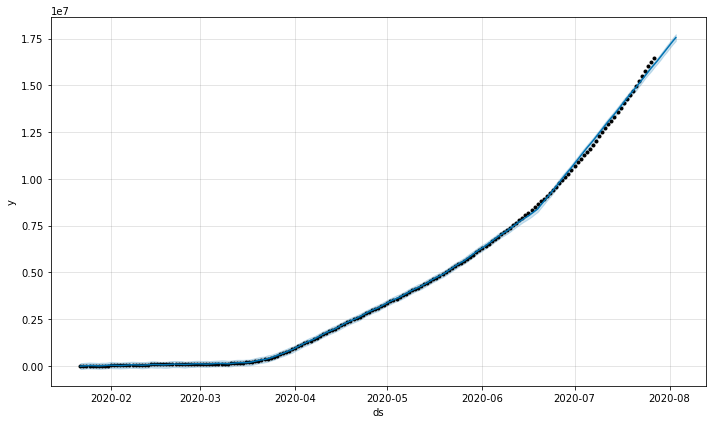

In [45]:
confirmed_forecast_plot = m.plot(forecast)

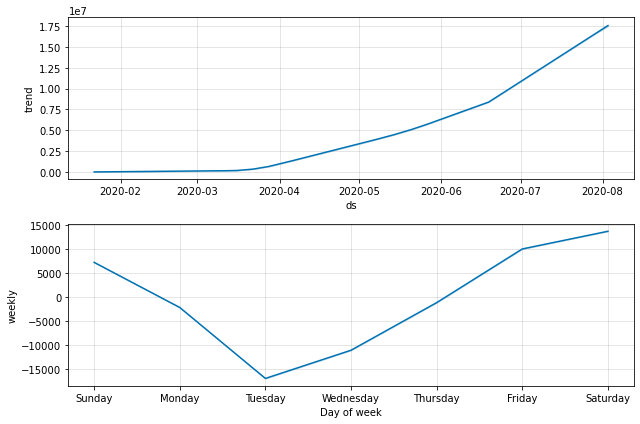

In [46]:
confirmed_forecast_plot = m.plot_components(forecast)

#Forecast on Death cases

In [47]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [48]:
m = Prophet()
m.fit(deaths)
future=m.make_future_dataframe(periods=7)
future.tail()

15:49:31 - cmdstanpy - INFO - Chain [1] start processing
15:49:32 - cmdstanpy - INFO - Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [49]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,663509.697722,661464.371959,665593.646071
191,2020-07-31,669026.358583,666743.090797,671284.625895
192,2020-08-01,673909.343577,671682.087421,676210.096544
193,2020-08-02,678047.385907,675433.769208,680589.002379
194,2020-08-03,682337.962852,679491.761006,685087.398167


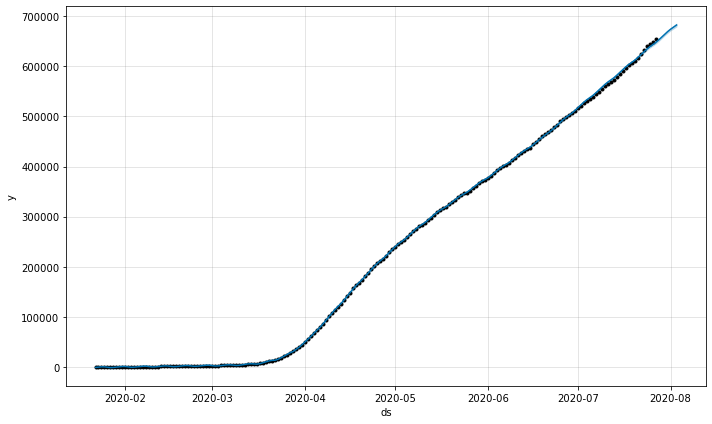

In [50]:
deaths_forecast_plot = m.plot(forecast)

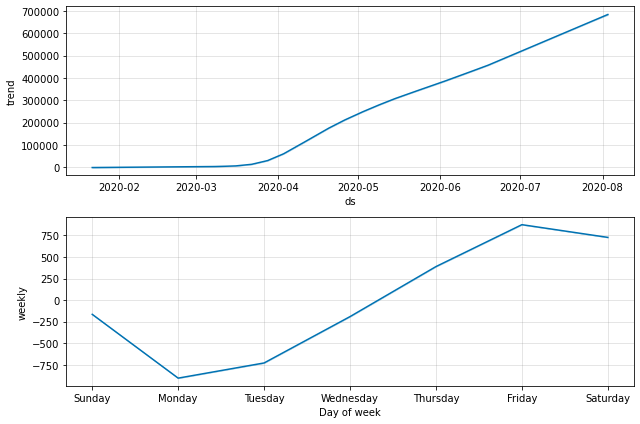

In [51]:
deaths_forecast_plot = m.plot_components(forecast)

#Forecast on recovered cases

In [52]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [53]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=21,freq='D')
future.tail()

15:49:33 - cmdstanpy - INFO - Chain [1] start processing
15:49:34 - cmdstanpy - INFO - Chain [1] done processing


,ds
204,2020-08-13
205,2020-08-14
206,2020-08-15
207,2020-08-16
208,2020-08-17


In [54]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
204,2020-08-13,1.151237e+07,1.135324e+07,1.164933e+07
205,2020-08-14,1.165391e+07,1.149230e+07,1.181165e+07
206,2020-08-15,1.179424e+07,1.163054e+07,1.196402e+07
207,2020-08-16,1.192029e+07,1.173809e+07,1.210871e+07
208,2020-08-17,1.205685e+07,1.186263e+07,1.224982e+07


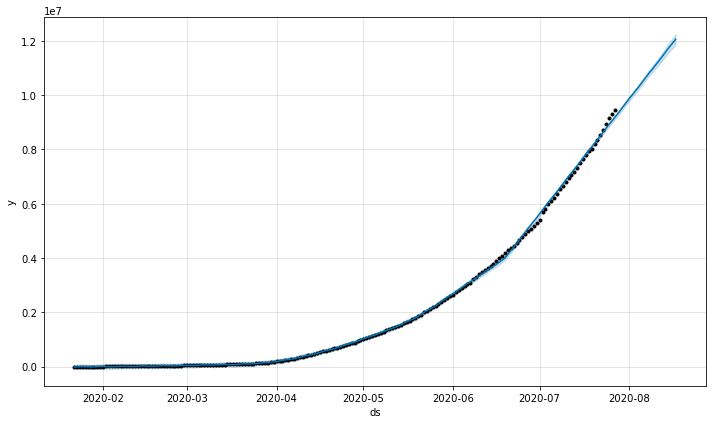

In [55]:
recovered_forecast_plot = m.plot(forecast)

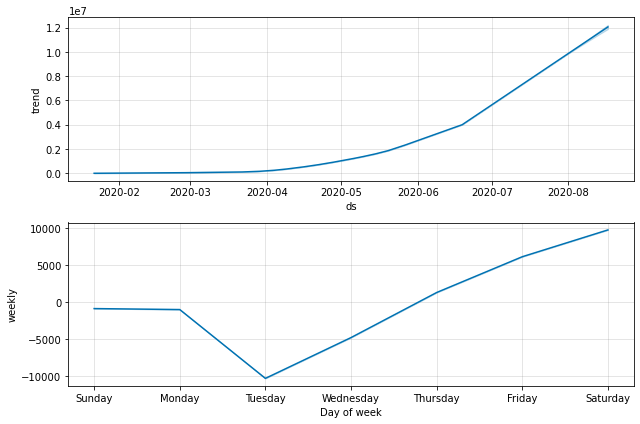

In [56]:
recovered_forecast_plot = m.plot_components(forecast)

In [57]:
forecast['yhat'] = forecast['yhat'].astype(int)
forecast['yhat']

0        -17699
1        -10508
2         -4573
3           145
4         -9414
         ...   
204    11512366
205    11653910
206    11794237
207    11920286
208    12056853
Name: yhat, Length: 209, dtype: int32